In [1]:
import pandas as pd 
import numpy as np

In [2]:
metro = pd.read_csv("metro.csv", sep = ',', dtype = {'bike_id': str})

## Encountered Warning:
C:\Users\shrut\AppData\Local\Temp\ipykernel_3676\3546838290.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
Original code: metro = pd.read_csv("metro.csv")
#### Solved by specifying dtype while importing the file.

In [3]:
metro.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,124657107,5,7/1/2019 0:04,7/1/2019 0:09,4312,34.066990,-118.290878,4410,34.063351,-118.296799,6168,30,One Way,Monthly Pass,standard
1,124657587,9,7/1/2019 0:07,7/1/2019 0:16,3066,34.063389,-118.236160,3066,34.063389,-118.236160,17584,30,Round Trip,Monthly Pass,electric
2,124658068,5,7/1/2019 0:20,7/1/2019 0:25,4410,34.063351,-118.296799,4312,34.066990,-118.290878,18920,30,One Way,Monthly Pass,electric
3,124659747,20,7/1/2019 0:44,7/1/2019 1:04,3045,34.028511,-118.256668,4275,34.012520,-118.285896,6016,1,One Way,Walk-up,standard
4,124660227,27,7/1/2019 0:44,7/1/2019 1:11,3035,34.048401,-118.260948,3049,34.056969,-118.253593,5867,30,One Way,Monthly Pass,standard


In [4]:
type(metro.iloc[1,10])

str

Why Bike sharing system?
While there are several advantages to this system, it comes with several difficulties for the operators like the optimum demand prediction due to different factors, which leads to a demand and supply problem for the operator, where to build new stations or expand old ones. They also need to know how they can maintain an adequate inventory of bikes.

Natural factors include seasons, months, day of week ,peak timings, working and non-working days, temperature, humidity etc. and man made factors consists of location of bike station, characteristics of the area.

Things I feel may affect the rush:
1. start time & end time (look for peek hrs)
2. Plan duration (pass type)
3. bike type

Things that can be done: (Pre processing)
1. Check rush months
2. Check peek hrs
3. Weekdays vs Weekends
4. Variation depending on season (monsoon more bus)

In [5]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92124 entries, 0 to 92123
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_id              92124 non-null  int64  
 1   duration             92124 non-null  int64  
 2   start_time           92124 non-null  object 
 3   end_time             92124 non-null  object 
 4   start_station        92124 non-null  int64  
 5   start_lat            89985 non-null  float64
 6   start_lon            89985 non-null  float64
 7   end_station          92124 non-null  int64  
 8   end_lat              88052 non-null  float64
 9   end_lon              88052 non-null  float64
 10  bike_id              92124 non-null  object 
 11  plan_duration        92124 non-null  int64  
 12  trip_route_category  92124 non-null  object 
 13  passholder_type      92124 non-null  object 
 14  bike_type            92124 non-null  object 
dtypes: float64(4), int64(5), object(6)
m

Null values in start lat, start lon, end lat, end lon

#### Checking count of null values

In [5]:
metro.isnull().sum()

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station             0
start_lat              2139
start_lon              2139
end_station               0
end_lat                4072
end_lon                4072
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
bike_type                 0
dtype: int64

To get rid of null values there are 2 options:
1. Remove rows (min 4072 or above rows can be deleted)
2. Drop lat and lon coloumns (4 cols)

### Removing rows with null values

In [6]:
mt_copy= metro

In [7]:
mt_copy = mt_copy.dropna(how='any',axis=0)

mt_copy.info()

In [8]:
mt_copy.duplicated().any()

False

## No Duplicates as the function returned false

In [10]:
mt_copy.describe()

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,plan_duration
count,8.676000e+04,86760.000000,86760.000000,86760.000000,86760.000000,86760.000000,86760.000000,86760.000000,86760.000000
mean,1.274167e+08,26.996404,3445.616367,34.035340,-118.283984,3449.219006,34.035114,-118.284264,59.330440
std,1.526039e+06,95.720579,597.544205,0.058808,0.069444,598.836056,0.058812,0.070127,108.474264
min,1.246571e+08,1.000000,3005.000000,33.710979,-118.495422,3005.000000,33.710979,-118.495422,1.000000
25%,1.261132e+08,6.000000,3028.000000,34.038609,-118.279762,3028.000000,34.038609,-118.280182,30.000000
50%,1.274679e+08,11.000000,3052.000000,34.046822,-118.258537,3052.000000,34.046810,-118.258537,30.000000
75%,1.287317e+08,21.000000,4250.000000,34.051941,-118.248253,4250.000000,34.051941,-118.247490,30.000000
max,1.303877e+08,1440.000000,4453.000000,34.177662,-118.231277,4453.000000,34.177662,-118.231277,999.000000


In [11]:
mt_copy["plan_duration"].describe()

count    86760.000000
mean        59.330440
std        108.474264
min          1.000000
25%         30.000000
50%         30.000000
75%         30.000000
max        999.000000
Name: plan_duration, dtype: float64

In [12]:
mt_copy["plan_duration"].value_counts()

30     55907
1      21451
365     9375
999       27
Name: plan_duration, dtype: int64

In [13]:
mt_copy.groupby("passholder_type")["plan_duration"].describe()

,count,mean,std,min,25%,50%,75%,max
passholder_type,,,,,,,,
Annual Pass,5966.0,365.000000,0.00000,365.0,365.0,365.0,365.0,365.0
Flex Pass,6.0,365.000000,0.00000,365.0,365.0,365.0,365.0,365.0
Monthly Pass,55904.0,30.000000,0.00000,30.0,30.0,30.0,30.0,30.0
One Day Pass,3599.0,1.000000,0.00000,1.0,1.0,1.0,1.0,1.0
Testing,27.0,999.000000,0.00000,999.0,999.0,999.0,999.0,999.0
Walk-up,21258.0,59.273544,133.47371,1.0,1.0,1.0,1.0,365.0


In [14]:
mt_copy.groupby("passholder_type")["trip_route_category"].describe()

,count,unique,top,freq
passholder_type,,,,
Annual Pass,5966,2,One Way,5621
Flex Pass,6,1,One Way,6
Monthly Pass,55904,2,One Way,49866
One Day Pass,3599,2,One Way,2291
Testing,27,2,Round Trip,21
Walk-up,21258,2,One Way,14239


###### Count: Total number of pass holders acc. to type
###### Unique: No. of unique values in each category ( One way/ Round)
###### Top: Frequent in that category
###### Freq: Frequency of top type (check)

In [15]:
mt_copy.groupby("passholder_type")["bike_type"].describe()

,count,unique,top,freq
passholder_type,,,,
Annual Pass,5966,3,electric,3344
Flex Pass,6,2,standard,4
Monthly Pass,55904,3,electric,35311
One Day Pass,3599,3,smart,1667
Testing,27,1,smart,27
Walk-up,21258,3,standard,8830


In [16]:
mt_copy["bike_type"].unique()

array(['standard', 'electric', 'smart'], dtype=object)

In [17]:
mt_copy.groupby("bike_type")["passholder_type"].describe()

,count,unique,top,freq
bike_type,,,,
electric,45818,5,Monthly Pass,35311
smart,11976,5,Walk-up,6286
standard,28966,5,Monthly Pass,16798


###### Type of pass held by different bike types
###### Top pass category for electric & standard is monthly pass

 So the first step is to convert them to date and time format using the function to_datetime() from the Pandas library. (can do)

#### Checking abnormality in trip duration

In [18]:
outliers_trip_duration = (mt_copy["duration"] < 1 | (mt_copy["duration"] > 480)) 
outliers_trip_duration.value_counts()

False    86760
Name: duration, dtype: int64

In [18]:
mt_copy.groupby("passholder_type")["duration"].max()

passholder_type
Annual Pass     1440
Flex Pass          9
Monthly Pass    1440
One Day Pass    1440
Testing          292
Walk-up         1440
Name: duration, dtype: int64

#### Consider a particular duration as a threshold and check for outliners

Checked for trips with duration > 12 hrs (720 mins) to find outliners

In [19]:
mt_copy[mt_copy["duration"] >= 720].count()

trip_id                456
duration               456
start_time             456
end_time               456
start_station          456
start_lat              456
start_lon              456
end_station            456
end_lat                456
end_lon                456
bike_id                456
plan_duration          456
trip_route_category    456
passholder_type        456
bike_type              456
dtype: int64

### Calculating the distance travelled by users

In [20]:
mt_copy["trip_distance"] = np.sqrt(((mt_copy["end_lat"] - mt_copy["start_lat"])**2) + ((mt_copy["end_lon"] - mt_copy["start_lon"])**2))


C:\Users\shrut\AppData\Local\Temp\ipykernel_2036\2829439795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_copy["trip_distance"] = np.sqrt(((mt_copy["end_lat"] - mt_copy["start_lat"])**2) + ((mt_copy["end_lon"] - mt_copy["start_lon"])**2))


In [ ]:
mt_copy["trip_distance"] = mt_copy["trip_distance"] * 111.139

In [22]:
mt_copy.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,trip_distance
0,124657107,5,7/1/2019 0:04,7/1/2019 0:09,4312,34.066990,-118.290878,4410,34.063351,-118.296799,6168,30,One Way,Monthly Pass,standard,0.772401
1,124657587,9,7/1/2019 0:07,7/1/2019 0:16,3066,34.063389,-118.236160,3066,34.063389,-118.236160,17584,30,Round Trip,Monthly Pass,electric,0.000000
2,124658068,5,7/1/2019 0:20,7/1/2019 0:25,4410,34.063351,-118.296799,4312,34.066990,-118.290878,18920,30,One Way,Monthly Pass,electric,0.772401
3,124659747,20,7/1/2019 0:44,7/1/2019 1:04,3045,34.028511,-118.256668,4275,34.012520,-118.285896,6016,1,One Way,Walk-up,standard,3.702761
4,124660227,27,7/1/2019 0:44,7/1/2019 1:11,3035,34.048401,-118.260948,3049,34.056969,-118.253593,5867,30,One Way,Monthly Pass,standard,1.254969


In [23]:
mt_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86760 entries, 0 to 92122
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_id              86760 non-null  int64  
 1   duration             86760 non-null  int64  
 2   start_time           86760 non-null  object 
 3   end_time             86760 non-null  object 
 4   start_station        86760 non-null  int64  
 5   start_lat            86760 non-null  float64
 6   start_lon            86760 non-null  float64
 7   end_station          86760 non-null  int64  
 8   end_lat              86760 non-null  float64
 9   end_lon              86760 non-null  float64
 10  bike_id              86760 non-null  object 
 11  plan_duration        86760 non-null  int64  
 12  trip_route_category  86760 non-null  object 
 13  passholder_type      86760 non-null  object 
 14  bike_type            86760 non-null  object 
 15  trip_distance        86760 non-null 

In [24]:
mt_copy["start_time"] = pd.to_datetime(mt_copy["start_time"])
mt_copy["end_time"] = pd.to_datetime(mt_copy["end_time"])

C:\Users\shrut\AppData\Local\Temp\ipykernel_13788\3072117926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_copy["start_time"] = pd.to_datetime(mt_copy["start_time"])
C:\Users\shrut\AppData\Local\Temp\ipykernel_13788\3072117926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_copy["end_time"] = pd.to_datetime(mt_copy["end_time"])


In [25]:
mt_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86760 entries, 0 to 92122
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   trip_id              86760 non-null  int64         
 1   duration             86760 non-null  int64         
 2   start_time           86760 non-null  datetime64[ns]
 3   end_time             86760 non-null  datetime64[ns]
 4   start_station        86760 non-null  int64         
 5   start_lat            86760 non-null  float64       
 6   start_lon            86760 non-null  float64       
 7   end_station          86760 non-null  int64         
 8   end_lat              86760 non-null  float64       
 9   end_lon              86760 non-null  float64       
 10  bike_id              86760 non-null  object        
 11  plan_duration        86760 non-null  int64         
 12  trip_route_category  86760 non-null  object        
 13  passholder_type      86760 non-

In [26]:
mt_copy["start_hour"] = mt_copy["start_time"].dt.hour
mt_copy["start_hour"].unique()

C:\Users\shrut\AppData\Local\Temp\ipykernel_13788\1171425692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_copy["start_hour"] = mt_copy["start_time"].dt.hour


array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  3], dtype=int64)

In [ ]:
mt_copy["start_day_num"] = mt_copy["start_time"].dt.dayofweek
day_dict = {0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}
mt_copy["start_day_name"]= mt_copy["start_day_num"].apply(lambda y:day_dict[y])

#### Change the day_dict (numbering of days) and change the condition in later code!!!

In [28]:
mt_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86760 entries, 0 to 92122
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   trip_id              86760 non-null  int64         
 1   duration             86760 non-null  int64         
 2   start_time           86760 non-null  datetime64[ns]
 3   end_time             86760 non-null  datetime64[ns]
 4   start_station        86760 non-null  int64         
 5   start_lat            86760 non-null  float64       
 6   start_lon            86760 non-null  float64       
 7   end_station          86760 non-null  int64         
 8   end_lat              86760 non-null  float64       
 9   end_lon              86760 non-null  float64       
 10  bike_id              86760 non-null  object        
 11  plan_duration        86760 non-null  int64         
 12  trip_route_category  86760 non-null  object        
 13  passholder_type      86760 non-

In [29]:
mt_copy.head(10)

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,trip_distance,start_hour,start_day_num,start_day_name
0,124657107,5,2019-07-01 00:04:00,2019-07-01 00:09:00,4312,34.066990,-118.290878,4410,34.063351,-118.296799,6168,30,One Way,Monthly Pass,standard,0.772401,0,0,Sunday
1,124657587,9,2019-07-01 00:07:00,2019-07-01 00:16:00,3066,34.063389,-118.236160,3066,34.063389,-118.236160,17584,30,Round Trip,Monthly Pass,electric,0.000000,0,0,Sunday
2,124658068,5,2019-07-01 00:20:00,2019-07-01 00:25:00,4410,34.063351,-118.296799,4312,34.066990,-118.290878,18920,30,One Way,Monthly Pass,electric,0.772401,0,0,Sunday
3,124659747,20,2019-07-01 00:44:00,2019-07-01 01:04:00,3045,34.028511,-118.256668,4275,34.012520,-118.285896,6016,1,One Way,Walk-up,standard,3.702761,0,0,Sunday
4,124660227,27,2019-07-01 00:44:00,2019-07-01 01:11:00,3035,34.048401,-118.260948,3049,34.056969,-118.253593,5867,30,One Way,Monthly Pass,standard,1.254969,0,0,Sunday
5,124659507,7,2019-07-01 00:51:00,2019-07-01 00:58:00,3056,34.037460,-118.265381,3031,34.044701,-118.252441,18530,30,One Way,Monthly Pass,electric,1.647992,0,0,Sunday
6,124662392,37,2019-07-01 01:22:00,2019-07-01 01:59:00,3047,34.039982,-118.266403,3047,34.039982,-118.266403,18877,30,Round Trip,Monthly Pass,electric,0.000000,1,0,Sunday
7,124663117,8,2019-07-01 02:06:00,2019-07-01 02:14:00,3069,34.050880,-118.248253,3022,34.046070,-118.233093,18984,30,One Way,Monthly Pass,electric,1.767640,2,0,Sunday
8,124664810,4,2019-07-01 02:43:00,2019-07-01 02:47:00,3014,34.056610,-118.237213,3030,34.051941,-118.243530,12126,30,One Way,Monthly Pass,standard,0.873018,2,0,Sunday
9,124669422,4,2019-07-01 04:17:00,2019-07-01 04:21:00,3075,34.042110,-118.256187,3064,34.046810,-118.256981,12398,30,One Way,Monthly Pass,standard,0.529755,4,0,Sunday


In [31]:
mt_copy["start_day_name"].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [42]:
mt_copy["weekend"] = np.where(((mt_copy["start_day_num"] == 6) | (mt_copy["start_day_num"] == 0)) , True, False)

C:\Users\shrut\AppData\Local\Temp\ipykernel_13788\3960194967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_copy["weekend"] = np.where(((mt_copy["start_day_num"] == 6) | (mt_copy["start_day_num"] == 0)) , True, False)


In [43]:
mt_copy.head(60)

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,trip_distance,start_hour,start_day_num,start_day_name,weekend
0,124657107,5,2019-07-01 00:04:00,2019-07-01 00:09:00,4312,34.066990,-118.290878,4410,34.063351,-118.296799,6168,30,One Way,Monthly Pass,standard,0.772401,0,0,Sunday,True
1,124657587,9,2019-07-01 00:07:00,2019-07-01 00:16:00,3066,34.063389,-118.236160,3066,34.063389,-118.236160,17584,30,Round Trip,Monthly Pass,electric,0.000000,0,0,Sunday,True
2,124658068,5,2019-07-01 00:20:00,2019-07-01 00:25:00,4410,34.063351,-118.296799,4312,34.066990,-118.290878,18920,30,One Way,Monthly Pass,electric,0.772401,0,0,Sunday,True
3,124659747,20,2019-07-01 00:44:00,2019-07-01 01:04:00,3045,34.028511,-118.256668,4275,34.012520,-118.285896,6016,1,One Way,Walk-up,standard,3.702761,0,0,Sunday,True
4,124660227,27,2019-07-01 00:44:00,2019-07-01 01:11:00,3035,34.048401,-118.260948,3049,34.056969,-118.253593,5867,30,One Way,Monthly Pass,standard,1.254969,0,0,Sunday,True
5,124659507,7,2019-07-01 00:51:00,2019-07-01 00:58:00,3056,34.037460,-118.265381,3031,34.044701,-118.252441,18530,30,One Way,Monthly Pass,electric,1.647992,0,0,Sunday,True
6,124662392,37,2019-07-01 01:22:00,2019-07-01 01:59:00,3047,34.039982,-118.266403,3047,34.039982,-118.266403,18877,30,Round Trip,Monthly Pass,electric,0.000000,1,0,Sunday,True
7,124663117,8,2019-07-01 02:06:00,2019-07-01 02:14:00,3069,34.050880,-118.248253,3022,34.046070,-118.233093,18984,30,One Way,Monthly Pass,electric,1.767640,2,0,Sunday,True
8,124664810,4,2019-07-01 02:43:00,2019-07-01 02:47:00,3014,34.056610,-118.237213,3030,34.051941,-118.243530,12126,30,One Way,Monthly Pass,standard,0.873018,2,0,Sunday,True
9,124669422,4,2019-07-01 04:17:00,2019-07-01 04:21:00,3075,34.042110,-118.256187,3064,34.046810,-118.256981,12398,30,One Way,Monthly Pass,standard,0.529755,4,0,Sunday,True


In [44]:
mt_copy.loc[5000,:]

trip_id                          124986041
duration                                 1
start_time             2019-07-06 12:54:00
end_time               2019-07-06 12:55:00
start_station                         3042
start_lat                        34.049301
start_lon                      -118.238808
end_station                           3042
end_lat                          34.049301
end_lon                        -118.238808
bike_id                              17506
plan_duration                           30
trip_route_category             Round Trip
passholder_type               Monthly Pass
bike_type                         electric
trip_distance                          0.0
start_hour                              12
start_day_num                            5
start_day_name                      Friday
weekend                              False
Name: 5000, dtype: object

In [48]:
mt_copy[mt_copy["start_day_name"] == "Wednesday"].head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,trip_distance,start_hour,start_day_num,start_day_name,weekend
2918,124843599,3,2019-07-04 00:06:00,2019-07-04 00:09:00,3008,34.046612,-118.262733,3064,34.046810,-118.256981,18530,30,One Way,Monthly Pass,electric,0.639650,0,3,Wednesday,False
2919,124892784,973,2019-07-04 00:28:00,2019-07-04 16:41:00,4405,34.051899,-118.293678,4405,34.051899,-118.293678,16385,365,Round Trip,Walk-up,electric,0.000000,0,3,Wednesday,False
2920,124843598,8,2019-07-04 00:33:00,2019-07-04 00:41:00,3038,34.046822,-118.248352,3075,34.042110,-118.256187,5913,365,One Way,Annual Pass,standard,1.016118,0,3,Wednesday,False
2921,124843855,105,2019-07-04 00:35:00,2019-07-04 02:20:00,4410,34.063351,-118.296799,4410,34.063351,-118.296799,17493,30,Round Trip,Monthly Pass,electric,0.000000,0,3,Wednesday,False
2922,124843854,21,2019-07-04 00:44:00,2019-07-04 01:05:00,4227,34.029800,-118.270309,3063,34.048038,-118.253738,12358,1,One Way,Walk-up,standard,2.738675,0,3,Wednesday,False


In [49]:
mt_copy['start_month_num'] = mt_copy['start_time'].dt.month
mt_copy["start_month_num"].unique()

C:\Users\shrut\AppData\Local\Temp\ipykernel_13788\2252108594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_copy['start_month_num'] = mt_copy['start_time'].dt.month


array([7, 8, 9], dtype=int64)

In [50]:
mt_copy.head(-10)

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,...,plan_duration,trip_route_category,passholder_type,bike_type,trip_distance,start_hour,start_day_num,start_day_name,weekend,start_month_num
0,124657107,5,2019-07-01 00:04:00,2019-07-01 00:09:00,4312,34.066990,-118.290878,4410,34.063351,-118.296799,...,30,One Way,Monthly Pass,standard,0.772401,0,0,Sunday,True,7
1,124657587,9,2019-07-01 00:07:00,2019-07-01 00:16:00,3066,34.063389,-118.236160,3066,34.063389,-118.236160,...,30,Round Trip,Monthly Pass,electric,0.000000,0,0,Sunday,True,7
2,124658068,5,2019-07-01 00:20:00,2019-07-01 00:25:00,4410,34.063351,-118.296799,4312,34.066990,-118.290878,...,30,One Way,Monthly Pass,electric,0.772401,0,0,Sunday,True,7
3,124659747,20,2019-07-01 00:44:00,2019-07-01 01:04:00,3045,34.028511,-118.256668,4275,34.012520,-118.285896,...,1,One Way,Walk-up,standard,3.702761,0,0,Sunday,True,7
4,124660227,27,2019-07-01 00:44:00,2019-07-01 01:11:00,3035,34.048401,-118.260948,3049,34.056969,-118.253593,...,30,One Way,Monthly Pass,standard,1.254969,0,0,Sunday,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92108,130053104,13,2019-09-30 22:42:00,2019-09-30 22:55:00,4432,34.139568,-118.362251,4426,34.149872,-118.378891,...,30,One Way,Monthly Pass,smart,2.175209,22,0,Sunday,True,9
92109,130053102,6,2019-09-30 22:43:00,2019-09-30 22:49:00,4390,34.069271,-118.296593,4304,34.062580,-118.290092,...,30,One Way,Monthly Pass,standard,1.036829,22,0,Sunday,True,9
92110,130053101,5,2019-09-30 22:56:00,2019-09-30 23:01:00,4420,34.168629,-118.377068,4413,34.158321,-118.370811,...,365,One Way,Walk-up,smart,1.340158,22,0,Sunday,True,9
92111,130053100,151,2019-09-30 22:59:00,2019-10-01 01:30:00,4345,33.995560,-118.481552,4345,33.995560,-118.481552,...,1,Round Trip,Walk-up,smart,0.000000,22,0,Sunday,True,9


In [51]:
metro.head(10)

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,124657107,5,7/1/2019 0:04,7/1/2019 0:09,4312,34.066990,-118.290878,4410,34.063351,-118.296799,6168,30,One Way,Monthly Pass,standard
1,124657587,9,7/1/2019 0:07,7/1/2019 0:16,3066,34.063389,-118.236160,3066,34.063389,-118.236160,17584,30,Round Trip,Monthly Pass,electric
2,124658068,5,7/1/2019 0:20,7/1/2019 0:25,4410,34.063351,-118.296799,4312,34.066990,-118.290878,18920,30,One Way,Monthly Pass,electric
3,124659747,20,7/1/2019 0:44,7/1/2019 1:04,3045,34.028511,-118.256668,4275,34.012520,-118.285896,6016,1,One Way,Walk-up,standard
4,124660227,27,7/1/2019 0:44,7/1/2019 1:11,3035,34.048401,-118.260948,3049,34.056969,-118.253593,5867,30,One Way,Monthly Pass,standard
5,124659507,7,7/1/2019 0:51,7/1/2019 0:58,3056,34.037460,-118.265381,3031,34.044701,-118.252441,18530,30,One Way,Monthly Pass,electric
6,124662392,37,7/1/2019 1:22,7/1/2019 1:59,3047,34.039982,-118.266403,3047,34.039982,-118.266403,18877,30,Round Trip,Monthly Pass,electric
7,124663117,8,7/1/2019 2:06,7/1/2019 2:14,3069,34.050880,-118.248253,3022,34.046070,-118.233093,18984,30,One Way,Monthly Pass,electric
8,124664810,4,7/1/2019 2:43,7/1/2019 2:47,3014,34.056610,-118.237213,3030,34.051941,-118.243530,12126,30,One Way,Monthly Pass,standard
9,124669422,4,7/1/2019 4:17,7/1/2019 4:21,3075,34.042110,-118.256187,3064,34.046810,-118.256981,12398,30,One Way,Monthly Pass,standard


In [56]:
metro["start_time"][0]

'7/1/2019 0:04'

In [57]:
month_dict = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
mt_copy["start_month_name"]= mt_copy["start_month_num"].apply(lambda y:month_dict[y])
mt_copy["start_month_name"].unique()

C:\Users\shrut\AppData\Local\Temp\ipykernel_13788\3227155754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_copy["start_month_name"]= mt_copy["start_month_num"].apply(lambda y:month_dict[y])


array(['July', 'August', 'September'], dtype=object)

In [58]:
mt_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86760 entries, 0 to 92122
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   trip_id              86760 non-null  int64         
 1   duration             86760 non-null  int64         
 2   start_time           86760 non-null  datetime64[ns]
 3   end_time             86760 non-null  datetime64[ns]
 4   start_station        86760 non-null  int64         
 5   start_lat            86760 non-null  float64       
 6   start_lon            86760 non-null  float64       
 7   end_station          86760 non-null  int64         
 8   end_lat              86760 non-null  float64       
 9   end_lon              86760 non-null  float64       
 10  bike_id              86760 non-null  object        
 11  plan_duration        86760 non-null  int64         
 12  trip_route_category  86760 non-null  object        
 13  passholder_type      86760 non-

<AxesSubplot:ylabel='duration'>

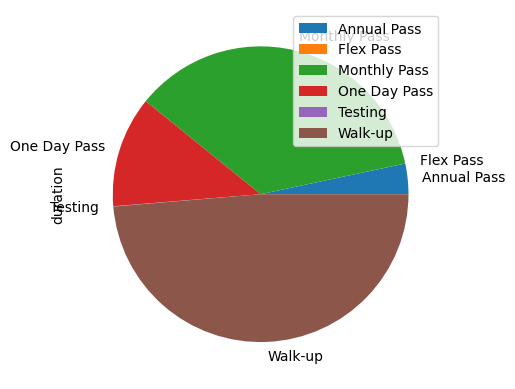

In [64]:
# Plotting the pie chart for above dataframe
mt_copy.groupby(['passholder_type']).sum().plot(kind='pie', y='duration')

In [65]:
mt_copy["plan_duration"].value_counts()

30     55907
1      21451
365     9375
999       27
Name: plan_duration, dtype: int64

In [67]:
trip_count= mt_copy['passholder_type'].value_counts()

In [68]:
trip_count

Monthly Pass    55904
Walk-up         21258
Annual Pass      5966
One Day Pass     3599
Testing            27
Flex Pass           6
Name: passholder_type, dtype: int64

In [75]:
mt_copy.groupby(['passholder_type']).sum().plot(kind='pie', y=trip_count.values())

TypeError: 'numpy.ndarray' object is not callable

In [78]:
import matplotlib.pyplot as plt


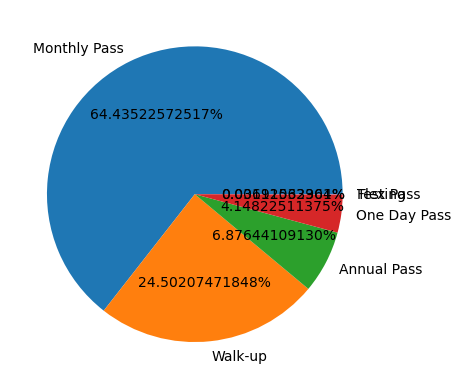

In [91]:
_ = plt.pie(trip_count.values, labels = trip_count.index, 
            autopct = '%1.11f%%',     ## display percentage
            shadow = False)           ## enable shadow effect

### Edit pie chart settings

In [86]:
trip_count.info()

<class 'pandas.core.series.Series'>
Index: 6 entries, Monthly Pass to Flex Pass
Series name: passholder_type
Non-Null Count  Dtype
--------------  -----
6 non-null      int64
dtypes: int64(1)
memory usage: 268.0+ bytes


### Next chart

In [113]:
day_count = mt_copy.groupby(["start_day_name"]).count()
day_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Friday to Wednesday
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   trip_id              7 non-null      int64
 1   duration             7 non-null      int64
 2   start_time           7 non-null      int64
 3   end_time             7 non-null      int64
 4   start_station        7 non-null      int64
 5   start_lat            7 non-null      int64
 6   start_lon            7 non-null      int64
 7   end_station          7 non-null      int64
 8   end_lat              7 non-null      int64
 9   end_lon              7 non-null      int64
 10  bike_id              7 non-null      int64
 11  plan_duration        7 non-null      int64
 12  trip_route_category  7 non-null      int64
 13  passholder_type      7 non-null      int64
 14  bike_type            7 non-null      int64
 15  trip_distance        7 non-null      int64
 16  start_hour           7

In [114]:
day_count = day_count["trip_id"]


In [117]:
day_count

start_day_name
Friday       10344
Monday       13556
Saturday     10563
Sunday       13199
Thursday     12908
Tuesday      12975
Wednesday    13215
Name: trip_id, dtype: int64

<AxesSubplot:xlabel='start_day_name'>

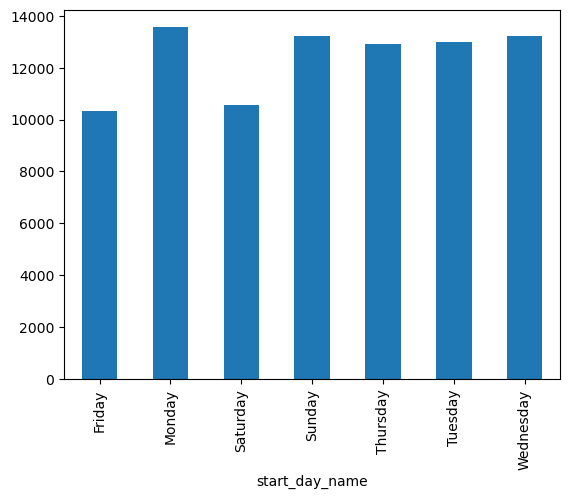

In [118]:
day_count.plot.bar()

### from the above bar chart the maximum trips are happening on Monday and Minimum on Friday


<AxesSubplot:xlabel='start_month_name'>

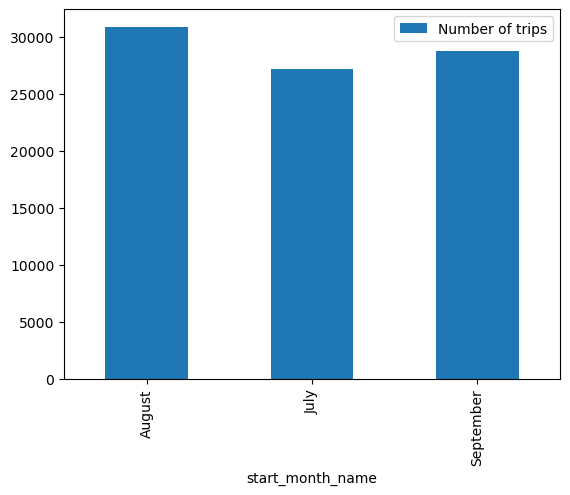

In [128]:
mt_copy.groupby(["start_month_name"]).count().plot.bar(y='trip_id', label = "Number of trips")

<AxesSubplot:xlabel='start_day_name'>

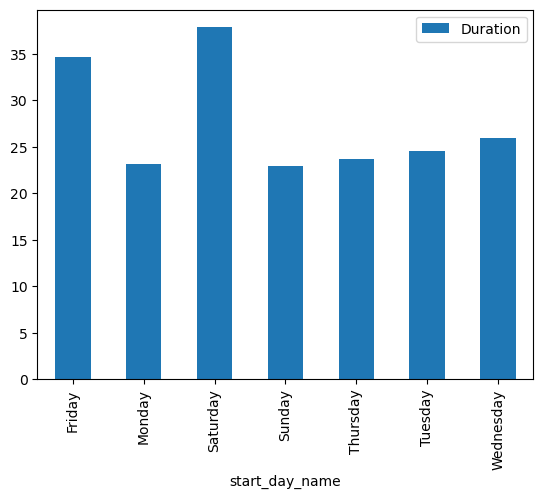

In [134]:

mt_copy.groupby(["start_day_name"]).mean().plot.bar(y='duration', label = "Duration")

<AxesSubplot:xlabel='passholder_type'>

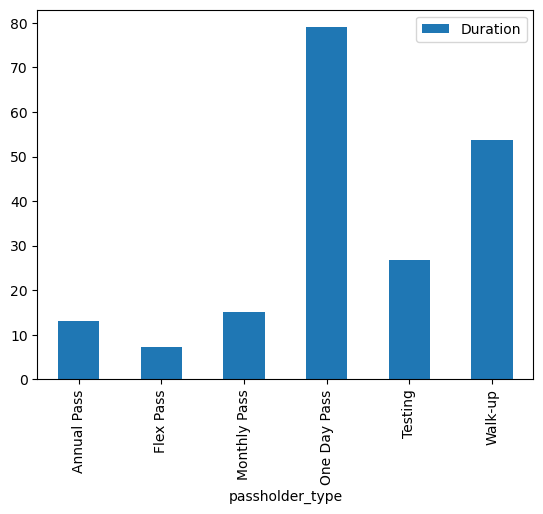

In [140]:
mt_copy.groupby(["passholder_type"]).mean().plot.bar(y='duration', label = "Duration")

In [141]:
mt_copy.groupby(["passholder_type"]).mean()

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,plan_duration,trip_distance,start_hour,start_day_num,weekend,start_month_num
passholder_type,,,,,,,,,,,,,,
Annual Pass,1.274540e+08,13.066711,3226.787295,34.047454,-118.260843,3219.546597,34.046813,-118.260659,365.000000,1.440342,14.052799,2.564700,0.244217,8.022628
Flex Pass,1.251321e+08,7.333333,3053.666667,34.048659,-118.252242,3039.833333,34.048607,-118.250409,365.000000,1.305456,16.000000,2.666667,0.166667,7.000000
Monthly Pass,1.275361e+08,15.012843,3330.558922,34.046668,-118.267985,3335.573125,34.046418,-118.268051,30.000000,1.235484,14.044541,2.666267,0.265741,8.079207
One Day Pass,1.276814e+08,79.005835,3873.498750,34.012540,-118.358140,3888.126424,34.012815,-118.359587,1.000000,1.371191,14.086135,3.580995,0.319811,8.164768
Testing,1.279286e+08,26.740741,4353.703704,34.021938,-118.440737,4351.888889,34.021319,-118.442153,999.000000,0.549613,12.740741,3.222222,0.370370,8.259259
Walk-up,1.270474e+08,53.620566,3736.123013,34.006025,-118.319806,3737.201948,34.005895,-118.320582,59.273544,1.413353,14.559413,3.223916,0.295747,7.830229


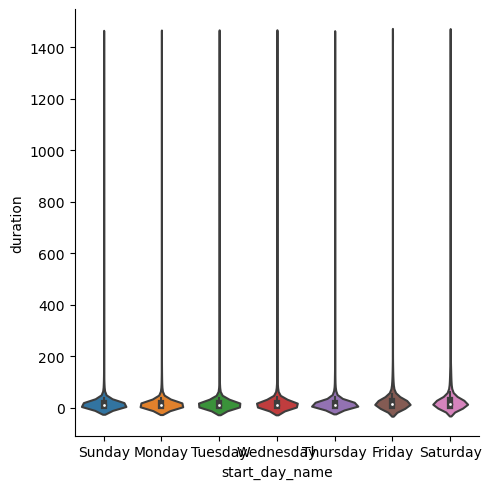

In [139]:
import seaborn as sns
sns.catplot(x='start_day_name', y='duration', data=mt_copy, kind="violin")